In [1]:
# PURPOSE OF NOTEBOOK
# Explore the potential of business level data for extraploting predicaitons of a business star rating.  

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [3]:
# Import in only those rows from Yelp's business.json file than have: 
# 'OH' as the state  
business = pd.read_csv('./business_oh.csv')

In [4]:
# check the shape
business.shape

(14697, 14)

In [5]:
# check the head
business.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,4GBVPIYRvzGh4K4TkRQ_rw,Options Salon & Spa,21689 Lorain Rd,Fairview Park,OH,44126,41.440825,-81.854097,4.5,8,1,"{'ByAppointmentOnly': 'False', 'BusinessAccept...","Beauty & Spas, Nail Salons, Day Spas, Massage","{'Tuesday': '9:0-21:0', 'Wednesday': '9:0-21:0..."


In [6]:
# INITIAL DATA CLEAN

In [7]:
# check data types
business.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

In [8]:
# check for null values
business.isnull().sum()

business_id        0
name               0
address          253
city               0
state              0
postal_code       20
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes      2094
categories        32
hours           3552
dtype: int64

In [9]:
# check for zero values
business.astype(bool).sum(axis=0)

business_id     14697
name            14697
address         14697
city            14697
state           14697
postal_code     14697
latitude        14697
longitude       14697
stars           14697
review_count    14697
is_open         12546
attributes      14697
categories      14697
hours           14697
dtype: int64

In [10]:
# Turn post_code from a float into a string and make a it a new column and fill nan as 0
business['postal_code_str'] = business.postal_code.astype(str)
business['postal_code_str'] = business['postal_code_str'].map(lambda x: x.rstrip('.0'))
business['postal_code_str'].fillna(0, inplace=True)

In [11]:
# OVERVIEW OF STAR RATINGS 

In [12]:
# Reminder on stars 
print(business.stars.min())
print(business.stars.max())
print(business.stars.min()+ business.stars.max() / 2)

1.0
5.0
3.5


In [13]:
# Average star ratings of businesses skew slightly lower
print(business.stars.mean())
print(business.stars.std())

3.5053412261005645
1.0124037052992139


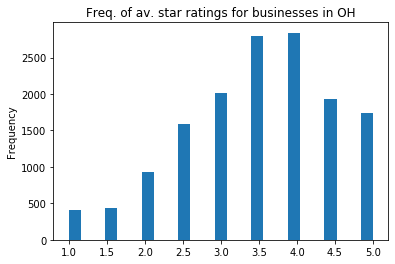

In [14]:
# Skew can be seen graphically
business.stars.plot(kind='hist', bins=25, title= 'Freq. of av. star ratings for businesses in OH');

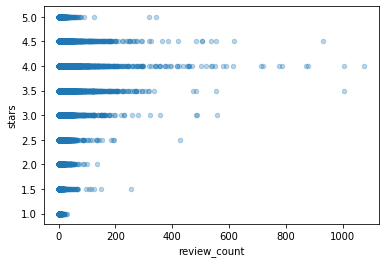

In [15]:
# To just above the mean star ratings, in general businesses that have higher star ratings tend to have received more reviews
business.plot(kind='scatter', x='review_count', y='stars', alpha=0.3);

In [16]:
# CORRELATION BETWEEN REVIEW COUNT FOR A BUSINESS AND AVERAGE RATING 

In [17]:
# total number of reviews
business.review_count.sum()

310545

In [18]:
# Get data description of review count 
business.review_count.describe()

count    14697.000000
mean        21.129822
std         47.140053
min          3.000000
25%          4.000000
50%          7.000000
75%         18.000000
max       1074.000000
Name: review_count, dtype: float64

In [19]:
# Creeate a dataframe to map the freq and ratings of different values of total reviews for businesses
business_review_count = pd.concat([business.review_count.value_counts(), business.groupby('review_count').stars.mean()], axis=1)
business_review_count.reset_index(level=0, inplace=True)
business_review_count.columns = ['review_count_for_biz', 'freq_of_businesses', 'average_rating']
business_review_count

,review_count_for_biz,freq_of_businesses,average_rating
0,3,3265,3.405054
1,4,1632,3.465380
2,5,1094,3.523309
3,6,894,3.519575
4,7,683,3.537335
...,...,...,...
300,879,1,4.000000
301,932,1,4.500000
302,1005,1,3.500000
303,1006,1,4.000000


In [20]:
business_review_count.iloc[9,1]

305

In [21]:
business_review_count.iloc[0,1] / len(business_review_count)

10.704918032786885

In [22]:
business_3_reviews = business[business.review_count == 3]

In [23]:
# Check for correlation between review count and aveage rating
business_review_count.corr()

,review_count_for_biz,freq_of_businesses,average_rating
review_count_for_biz,1.00000,-0.203260,0.291400
freq_of_businesses,-0.20326,1.000000,-0.151297
average_rating,0.29140,-0.151297,1.000000


Text(0.5, 1, 'Correlation between av. review count for locations with the same # of reviews')

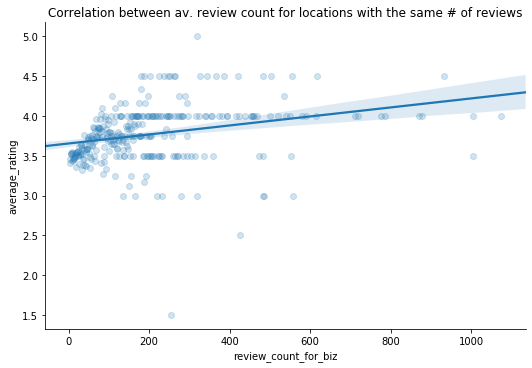

In [24]:
# map the correlation between review count and average rating
sns.lmplot(x='review_count_for_biz', y='average_rating', data=business_review_count, aspect=1.5, scatter_kws={'alpha':0.2});
ax = plt.gca()
ax.set_title('Correlation between av. review count for locations with the same # of reviews')

Text(0.5, 1, 'Correlation between av. review count < 250 and average rating for locations with the same # of reviews')

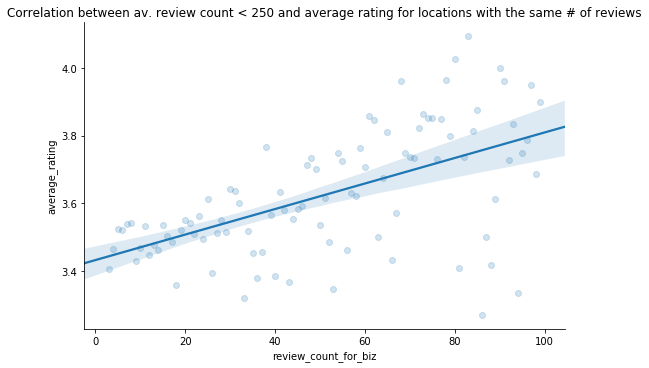

In [25]:
# # Check for correlation between review count and average rating when only businesses that have 250 or less total reviews are plotted.
business_review_count_less_than_250 = business_review_count[business_review_count.review_count_for_biz < 100]
sns.lmplot(x='review_count_for_biz', y='average_rating', data=business_review_count_less_than_250, aspect=1.5, scatter_kws={'alpha':0.2});
ax = plt.gca()
ax.set_title('Correlation between av. review count < 250 and average rating for locations with the same # of reviews')

In [26]:
# See strong correlation between average rating and review count
business_review_count_less_than_250.corr()

,review_count_for_biz,freq_of_businesses,average_rating
review_count_for_biz,1.000000,-0.484121,0.581257
freq_of_businesses,-0.484121,1.000000,-0.264657
average_rating,0.581257,-0.264657,1.000000


In [27]:
# BUSINESSES IN OH WITH MORE THAN ONE LOCATION 

In [28]:
# Pulling together data set on multi location businesses
business_name = pd.concat([business.name.value_counts(),business.groupby('name').stars.mean()], axis=1)
business_name.reset_index(level=0, inplace=True)
business_name.columns = ['name', 'number_of_locations', 'average_rating']
business_rating_total = business.groupby('name')['review_count'].sum().to_frame()
business_rating_total.reset_index(inplace = True)
del business_rating_total['name']
business_name_revised = pd.concat([business_name, business_rating_total], axis=1)
business_name_revised.head(1)

/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,name,number_of_locations,average_rating,review_count
0,#1 Pho,1,3.5,8


In [29]:
# 88% of businesses have only one location
business_name_revised.number_of_locations.value_counts(normalize=True).head(10)

1     0.922940
2     0.040043
3     0.011390
4     0.007653
5     0.003559
6     0.002136
8     0.001958
7     0.001691
9     0.000979
12    0.000890
Name: number_of_locations, dtype: float64

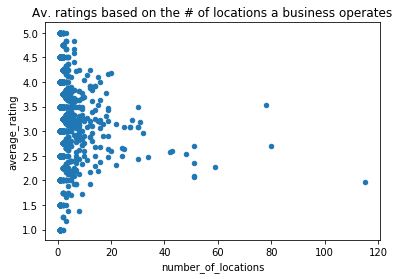

In [30]:
# Shows wide variety of ratings for restuarants that businesses that have only one location
# sns.lmplot(x='freq_of_name', y='average_rating', data=business_name, aspect=1.5, scatter_kws={'alpha':0.2});
business_name.plot(kind='scatter', x='number_of_locations', y='average_rating', title = 'Av. ratings based on the # of locations a business operates')

In [31]:
# Average rating for businesses sorted by those with the most locations
business_name_revised.sort_values('number_of_locations', ascending=False).head(30)

,name,number_of_locations,average_rating,review_count
6277,McDonald's,115,1.973913,985
9356,Subway,80,2.706250,316
9184,Starbucks,78,3.532051,1216
1536,Burger King,59,2.271186,283
9555,Taco Bell,51,2.352941,452
4017,Giant Eagle,51,2.705882,473
10838,Wendy's,51,2.098039,395
7688,Pizza Hut,51,2.058824,380
1997,Chipotle Mexican Grill,48,2.541667,1390
7359,Panera Bread,43,2.604651,890


In [32]:
business_name_revised['averege_reviews_location'] =  business_name_revised['review_count']/business_name_revised['number_of_locations']

In [33]:
# OPEN / CLOSED

In [34]:
# Check for the number of businesses that are open
print(business.is_open.value_counts(normalize=True))
print('33% of restuarants are no longer open')

1    0.853644
0    0.146356
Name: is_open, dtype: float64
33% of restuarants are no longer open


In [35]:
# see if open and closed busineswses have different average review count and stars
open_closed = business.groupby('is_open').review_count.agg(['count', 'sum'])
open_closed.reset_index(inplace = True)
open_closed.columns = ['is_open', 'count', 'review_count']
open_closed['av_review_count'] = open_closed['review_count']/open_closed['count']
open_closed = open_closed.merge(business.groupby('is_open').stars.sum(), on='is_open', how='left')
open_closed['av_stars'] = open_closed['stars']/open_closed['count']
open_closed

,is_open,count,review_count,av_review_count,stars,av_stars
0,0,2151,33611,15.625755,7262.5,3.376337
1,1,12546,276934,22.073490,44255.5,3.527459


In [36]:
print(3.37/3.52 -1)
22.1/15.6 - 1

-0.042613636363636354


0.41666666666666674

In [37]:
# the group of businesses that are open have in aggregate of 40% as many reviews as those that are closed
# but the aggregate rating is close to identifcal between businesses that are open and those that are closed

In [38]:
# Calculate baseline is higher that the prediction using logistical regression
business['is_open'].value_counts().iloc[0] / len(business)

0.8536436007348438

In [39]:
# Logistical regression

In [40]:
# correlate is_open to review_count using logistical regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
LR = LogisticRegression()
feature_cols = ['review_count']
X = business[feature_cols]
y = business.is_open

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
LR.score(X_test, y_test)

/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8497959183673469

In [41]:
# KNN Model

In [42]:
# Calculate accuracy using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=62)
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [43]:
# accuracy rate for KNN model 
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.8541496598639455


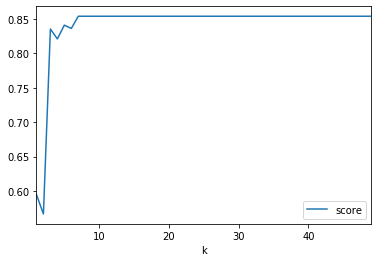

In [44]:
# search for optimal neighbor count for KNN
scores = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])
    
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

In [45]:
# Neural Network Model

In [46]:
# Now use a neural network

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense

import pandas as pd

%matplotlib inline

Using TensorFlow backend.
/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/hanhuang/opt/anaconda3/lib/p

In [47]:
feature_cols = ['review_count']
X = business[feature_cols]
y = business.is_open

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

n_input = X_train.shape[1]
n_input


model = Sequential()
model.add(Dense(18, input_dim = n_input, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model = Sequential()
model.add(Dense(18, input_dim = n_input, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Fit it
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=None,
    verbose=2
)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 11022 samples, validate on 3675 samples
Epoch 1/30
 - 0s - loss: 0.4766 - acc: 0.8544 - val_loss: 0.4202 - val_acc: 0.8514
Epoch 2/30
 - 0s - loss: 0.4143 - acc: 0.8544 - val_loss: 0.4200 - val_acc: 0.8514
Epoch 3/30
 - 0s - loss: 0.4142 - acc: 0.8544 - val_loss: 0.4197 - val_acc: 0.8514
Epoch 4/30
 - 0s - loss: 0.4137 - acc: 0.8544 - val_loss: 0.4197 - val_acc: 0.8514
Epoch 5/30
 - 0s - loss: 0.4138 - acc: 0.8544 - val_loss: 0.4195 - val_acc: 0.8514
Epoch 6/30
 - 0s - loss: 0.4135 - acc: 0.8544 - val_loss: 0.4193 - val_acc: 0.8514
Epoch 7/30
 - 0s - loss: 0.4136 - acc: 0.8544 - val_loss: 0.4195 - val_acc: 0.8514
Epoch 8/30
 - 0s - loss: 0.4134 - acc: 0.8544 - val_loss: 0.4191 - val_acc: 0.8514
Epoch 9/30
 - 0s - loss: 0.4134 - acc: 0.8544 - val_loss: 0.4190 - val_acc: 0.8514
Epoch 10/30
 - 0s - loss: 0.4133 - acc: 0.8544 - val_loss: 0.4190 - val_acc: 0.8514


In [49]:
# Import the DecisionTree Classifier from scikit's tree module
from sklearn.tree import DecisionTreeClassifier

# Instantiate your dtc object as assign it to the variable name "model"
model = DecisionTreeClassifier()

# Select your features
X = business[['latitude', 'longitude', 'review_count', 'stars']]

# Set your target variable
y = business['is_open']
    
    
# Fit the model
model.fit(X, y)

# Helper function to visualize Decision Trees (creates a file tree.png)
from sklearn.tree import export_graphviz
from os import system 
def build_tree_image(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model, out_file = dotfile, feature_names = X.columns)
    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")
    
build_tree_image(model)# Decision Tree

In [50]:
#graph_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)
graph_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Setting class_weight to 'balanced' will replicate the 
# minority class until the two classes have equal representation

# When proportion=True, the output is the fraction of records 
# for each class that have reached that node.

graph_X = X[:200]
graph_y = y[:200]

In [51]:
print(graph_X.shape)
print(graph_y.shape)

(200, 4)
(200,)


In [52]:
graph_model.fit(graph_X, graph_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [53]:
# This was working but for some reason its stopped and now its working again! 
dot_data = tree.export_graphviz(graph_model, out_file=None, feature_names=X.columns,
                                filled=True, rounded=True, special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())

NameError: name 'tree' is not defined

In [54]:
from sklearn.model_selection import cross_val_score

# model is the estimator or the object to used to fit the data.
# X is your features, y is your target. You then select a scoring method -
# here we choose area under the curve (auc) as the evaluation metric. 
# cv: the number of folds (default is 3)
scores = cross_val_score(model, graph_X, graph_y, scoring='roc_auc', cv=5)
print('CV AUC {}, \nAverage AUC {}'.format(scores, scores.mean()))

CV AUC [0.70643939 0.51082251 0.47619048 0.46103896 0.56473214], 
Average AUC 0.543844696969697


In [55]:
# Random Forrest 

In [56]:
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus

/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [57]:
# Select your features
X = business[['latitude', 'longitude', 'review_count', 'stars']]

# Set your target variable
y = business['is_open']

In [58]:
# Import RandomForestClassifier from scikit's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Instanitate your Random Forest Classifier model object with n_estimators or
# the number of trees in the forest set to 20 (default is 10)
model_3 = RandomForestClassifier(n_estimators = 20)

# Fit your model on the features (X) and the target (y)
model_3.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
# Set features variable with the names of the features in X
features = X.columns
print("Feature columns:", features)

Feature columns: Index(['latitude', 'longitude', 'review_count', 'stars'], dtype='object')


In [60]:
# Set feature_importances variable using the attribute "feature_importances_".
# The higher the score, the more important the feature in that particular combination.
# If you changed the features in X it would impact the scores.
# Similar to coefficients in that respect.
feature_importances = model_3.feature_importances_
print("Feature Importance scores:", feature_importances)

Feature Importance scores: [0.37733709 0.37929263 0.15871246 0.08465782]


In [61]:
# Create a dataframe of the features and their respective importance scores
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})

# Sort the values by "Importance Score" with ascending in false to ensure
# the score appear from highest to lowest in the new dataframe
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
1,longitude,0.379293
0,latitude,0.377337
2,review_count,0.158712
3,stars,0.084658


In [62]:
from sklearn.model_selection import cross_val_score

# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# cross_val_score(estimator, features, target, chosen scoring method) assigned to the variable "scores."
# scores will be a numpy array
scores = cross_val_score(model_3, X, y, scoring='roc_auc', cv = 5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

# A for loop for running a Random Forest Classifier with n-estimators (or number of trees in your forest).
# The is 1 to 100 in steps of 10 - range(start, end, step)
for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv = 5)
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

CV AUC [0.58515959 0.6057106  0.60749766 0.59137384 0.59386441], Average AUC 0.5967212232789282
n trees: 1, CV AUC [0.51027861 0.52701994 0.53095832 0.51843039 0.51865609], Average AUC 0.521068670163223
n trees: 11, CV AUC [0.60433718 0.57785692 0.59242958 0.58271988 0.55043564], Average AUC 0.581555840593132
n trees: 21, CV AUC [0.59191309 0.59809013 0.58860891 0.59129552 0.58323338], Average AUC 0.5906282083133481
n trees: 31, CV AUC [0.59789427 0.59455495 0.60093709 0.60101217 0.58678803], Average AUC 0.5962373021488819
n trees: 41, CV AUC [0.59979109 0.59959448 0.60940382 0.58774134 0.59626739], Average AUC 0.5985596251991213
n trees: 51, CV AUC [0.5953587  0.60879531 0.60349393 0.59026203 0.59622846], Average AUC 0.5988276892320823
n trees: 61, CV AUC [0.5918188  0.60916422 0.60789669 0.59458971 0.60620232], Average AUC 0.6019343484789095
n trees: 71, CV AUC [0.59566514 0.60437958 0.61719067 0.6003068  0.60284464], Average AUC 0.6040773669677104
n trees: 81, CV AUC [0.60345532 0.6

In [63]:
# ZIP

In [64]:
business['postal_code_str']

0        44126
1         4406
2        44094
3        44145
4        44106
         ...  
14692     4424
14693    44333
14694    44224
14695    44121
14696     4421
Name: postal_code_str, Length: 14697, dtype: object

In [65]:
# Create a dataframe for postal_code_str and the mean for 'stars'
zip_stars = pd.DataFrame(business.groupby('postal_code_str').stars.mean().round(2))
zip_stars.reset_index(level=0, inplace=True)
# Create a dataframe for postal_code_str and the sum of 'review_count'
zip_review_count = pd.DataFrame(business.groupby('postal_code_str').review_count.sum())
zip_review_count.reset_index(level=0, inplace=True)
# both these dataframes has a nan value - am not sure why
# merge these two dataframes 
zip_stars_review = pd.merge(zip_stars,zip_review_count)
zip_stars_review.sort_values(by=['review_count'])
# create a dataframe of the number of businesses in each zip 
# there are no nan values here
zip_business_count = pd.DataFrame(business['postal_code_str'].value_counts())
zip_business_count.reset_index(level=0, inplace=True)
zip_business_count.columns = ['postal_code_str','number_of businesses_by_zip']
zip_business_count
# merge the data frames together as a new dataframe 
zip = pd.merge(zip_stars_review,zip_business_count)
# Calculate av num of reviews per location per zip
zip['av_num_of_reviews_per_businesses_by_zip'] = (zip['review_count'] / zip['number_of businesses_by_zip']).round()
# do sort
zip.sort_values('stars', ascending = True).head(5)

,postal_code_str,stars,review_count,number_of businesses_by_zip,av_num_of_reviews_per_businesses_by_zip
135,4515,1.00,4,1,4.0
1,28079,1.50,12,1,12.0
114,44258,1.67,12,3,4.0
92,44199,2.00,6,2,3.0
98,44219,2.50,4,1,4.0


In [66]:
zip.sort_values('stars', ascending = False).head(5)

,postal_code_str,stars,review_count,number_of businesses_by_zip,av_num_of_reviews_per_businesses_by_zip
28,44064,5.00,5,1,5.0
107,44237,5.00,3,1,3.0
103,44231,5.00,3,1,3.0
110,44242,4.75,8,2,4.0
2,43123,4.50,3,1,3.0


In [67]:
# See low business counts for rank 1 & 2
zip.sort_values('av_num_of_reviews_per_businesses_by_zip', ascending = False).head(5)

,postal_code_str,stars,review_count,number_of businesses_by_zip,av_num_of_reviews_per_businesses_by_zip
17,44045,3.25,257,2,128.0
124,44307,4.00,64,1,64.0
54,44113,3.79,34752,603,58.0
56,44115,3.63,14202,254,56.0
47,44106,3.55,11002,243,45.0


In [68]:
zip.sort_values('review_count', ascending = False).head(5)

,postal_code_str,stars,review_count,number_of businesses_by_zip,av_num_of_reviews_per_businesses_by_zip
54,44113,3.79,34752,603,58.0
48,44107,3.80,18028,541,33.0
55,44114,3.67,14825,358,41.0
56,44115,3.63,14202,254,56.0
63,44122,3.41,11506,451,26.0


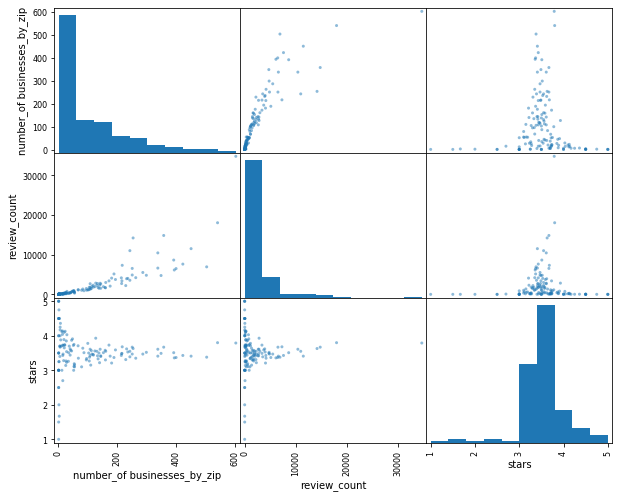

In [69]:
# Scatter matrix of three numerical columns
pd.plotting.scatter_matrix(zip[['number_of businesses_by_zip', 'review_count', 'stars']], figsize=(10, 8));

In [70]:
zip.sort_values('review_count', ascending = False).head(5)

,postal_code_str,stars,review_count,number_of businesses_by_zip,av_num_of_reviews_per_businesses_by_zip
54,44113,3.79,34752,603,58.0
48,44107,3.80,18028,541,33.0
55,44114,3.67,14825,358,41.0
56,44115,3.63,14202,254,56.0
63,44122,3.41,11506,451,26.0


In [71]:
# review count correlates very well to business count by zip
abs(zip.corr()['review_count']).sort_values(ascending=False)

review_count                               1.000000
number_of businesses_by_zip                0.840972
av_num_of_reviews_per_businesses_by_zip    0.460614
stars                                      0.024093
Name: review_count, dtype: float64

In [72]:
# conclusion - the more reviews generated for businesses in a particular zip, the more likely they are to tend towards the mean 

In [73]:
# LATITUDE LONGITUDE

In [82]:
# Do clustering kmeans of lat lon
X = business[['latitude', 'longitude', 'review_count']]

from sklearn.cluster import KMeans
km = KMeans(n_clusters=10, random_state=1)
km.fit(X)

km.labels_

lat_long_df = business
lat_long_df['lat_lon_cluster'] = km.labels_

km.cluster_centers_

lat_long_groupby_df = lat_long_df.groupby('lat_lon_cluster').mean().sort_values('stars')
lat_long_groupby_df 

,latitude,longitude,stars,review_count,is_open
lat_lon_cluster,,,,,
7,41.405004,-81.655725,3.464836,5.027083,0.847111
1,41.408748,-81.655550,3.495747,16.883634,0.851990
6,41.418755,-81.645971,3.551435,38.227273,0.841308
4,41.419818,-81.652360,3.707891,67.743551,0.896813
8,41.420811,-81.660544,3.775862,111.596817,0.907162
0,41.445480,-81.659154,3.803867,170.845304,0.950276
5,41.454293,-81.686698,3.856164,264.013699,0.958904
2,41.462097,-81.672902,3.952381,553.238095,0.952381
9,41.482522,-81.691090,3.964286,396.321429,0.964286


In [83]:
# count the number of rows in each cluster
from collections import Counter, defaultdict
print(Counter(km.labels_))

Counter({7: 9157, 1: 2939, 6: 1254, 4: 659, 8: 377, 0: 181, 5: 73, 9: 28, 2: 21, 3: 8})


In [84]:
# Does a search on the coordinates for lat lon 3 gies this location Arizona 202 Loop East, Phoenix, AZ 85008

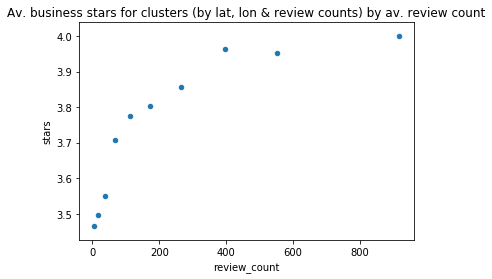

In [85]:
# Plotting average review count per business in a zip against average star rating 
lat_long_groupby_df.plot(kind='scatter', x='review_count', y='stars', title = 'Av. business stars for clusters (by lat, lon & review counts) by av. review count');

In [75]:
# zips are not unique for each cluster
lat_long_df[lat_long_df.lat_lon_cluster == 3].postal_code_str.value_counts()

44113    4
44115    3
44107    1
Name: postal_code_str, dtype: int64

In [76]:
lat_long_df[lat_long_df.lat_lon_cluster == 3].review_count.sum() / len(lat_long_df[lat_long_df.lat_lon_cluster == 3])

916.0

In [77]:
# No add zip 
# Do clustering of lat lon
X = business[['latitude', 'longitude', 'review_count']]

from sklearn.cluster import KMeans
km = KMeans(n_clusters=10, random_state=1)
km.fit(X)

km.labels_

lat_long_zip_df = business

lat_long_zip_df['lat_lon_cluster'] = km.labels_

km.cluster_centers_



array([[ 41.44548001, -81.65915445, 170.84530387],
       [ 41.40874766, -81.65555002,  16.88363389],
       [ 41.46209727, -81.67290156, 553.23809524],
       [ 41.48925795, -81.70802644, 916.        ],
       [ 41.41981814, -81.65236026,  67.74355083],
       [ 41.45429292, -81.68669764, 264.01369863],
       [ 41.41875516, -81.64597069,  38.22727273],
       [ 41.40500422, -81.6557248 ,   5.02708311],
       [ 41.42081124, -81.66054403, 111.59681698],
       [ 41.48252159, -81.69109023, 396.32142857]])

In [78]:
# CATEGORIES

In [79]:
business.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,postal_code_str,lat_lon_cluster
0,4GBVPIYRvzGh4K4TkRQ_rw,Options Salon & Spa,21689 Lorain Rd,Fairview Park,OH,44126,41.440825,-81.854097,4.5,8,1,"{'ByAppointmentOnly': 'False', 'BusinessAccept...","Beauty & Spas, Nail Salons, Day Spas, Massage","{'Tuesday': '9:0-21:0', 'Wednesday': '9:0-21:0...",44126,7


In [80]:
categories_dummies = business['categories'].str.get_dummies(', ').replace(0, '')

In [81]:
categories_dummies.shape

(14697, 1000)

In [82]:
categories_df = pd.concat([business, categories_dummies.reindex(categories_dummies.index)], axis=1)
categories_df.shape
categories_df.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Wine Tasting Room,Wine Tours,Wineries,Women's Clothing,Workers Compensation Law,Wraps,Yelp Events,Yoga,Ziplining,Zoos
0,4GBVPIYRvzGh4K4TkRQ_rw,Options Salon & Spa,21689 Lorain Rd,Fairview Park,OH,44126,41.440825,-81.854097,4.5,8,...,,,,,,,,,,


In [83]:
categories_dummies.astype(bool).sum(axis=0).sort_values(ascending=False).head(30)

Restaurants                  5522
Food                         2621
Shopping                     2403
Nightlife                    1449
Bars                         1340
Beauty & Spas                1296
Automotive                   1148
American (Traditional)       1077
Home Services                 994
Event Planning & Services     945
Local Services                881
Sandwiches                    876
Pizza                         870
Health & Medical              799
American (New)                759
Fast Food                     754
Active Life                   720
Burgers                       681
Auto Repair                   642
Fashion                       558
Hotels & Travel               555
Hair Salons                   539
Coffee & Tea                  523
Home & Garden                 506
Arts & Entertainment          497
Breakfast & Brunch            485
Specialty Food                470
Italian                       461
Nail Salons                   454
Pets          

In [84]:
categories_df.groupby('Fast Food').stars.mean()

Fast Food
1    2.757294
     3.545794
Name: stars, dtype: float64

In [85]:
# Percentage difference with fast food aggregate star rating
categories_df.groupby('Fast Food').stars.mean()[1] / categories_df.groupby('Fast Food').stars.mean()[''] - 1

-0.22237593330322725

In [86]:
categories_df.groupby('Mexican').stars.mean()

Mexican
1    3.230205
     3.511877
Name: stars, dtype: float64

In [87]:
categories_df.groupby('Cafes').stars.mean()

Cafes
1    3.884615
     3.500929
Name: stars, dtype: float64

In [88]:
categories_df.groupby('Mediterranean').stars.mean()

Mediterranean
1    3.909449
     3.501819
Name: stars, dtype: float64

In [89]:
#ATTRIBUTES

In [90]:
business.shape

(14697, 16)

In [91]:
# drop rows that where the 'attributes' is null and create a new dataframe
business_attributes_not_nan = business[business['attributes'].notna()].reset_index()
business_attributes_not_nan.shape

(12603, 17)

In [92]:
business_attributes_not_nan.head(1)
# column labeled 'index' has been added which is not needed.
# for now we will ignore this rather than delete it

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,postal_code_str,lat_lon_cluster
0,0,4GBVPIYRvzGh4K4TkRQ_rw,Options Salon & Spa,21689 Lorain Rd,Fairview Park,OH,44126,41.440825,-81.854097,4.5,8,1,"{'ByAppointmentOnly': 'False', 'BusinessAccept...","Beauty & Spas, Nail Salons, Day Spas, Massage","{'Tuesday': '9:0-21:0', 'Wednesday': '9:0-21:0...",44126,7


In [93]:
# Extract json from 'business_attributes_not_nan' as a new dataframe
from pandas.io.json import json_normalize
from ast import literal_eval

def unnest_json(dataframe, column):
    dataframe_new = json_normalize(dataframe[column].apply(literal_eval))
    return dataframe_new

attributes_df = unnest_json(business_attributes_not_nan,'attributes')
# attributes_df.reset_index(level=0)
attributes_df.shape

(12603, 37)

In [94]:
# merge the two new dataframes
attributes_merged = pd.concat([business_attributes_not_nan, attributes_df.reindex(business_attributes_not_nan.index)], axis=1)
attributes_merged.shape

(12603, 54)

In [95]:
attributes_merged


,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,...,WheelchairAccessible,Smoking,DriveThru,BestNights,Corkage,BYOBCorkage,HairSpecializesIn,AgesAllowed,DietaryRestrictions,BYOB
0,0,4GBVPIYRvzGh4K4TkRQ_rw,Options Salon & Spa,21689 Lorain Rd,Fairview Park,OH,44126,41.440825,-81.854097,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,-K4gAv8_vjx8-2BxkVeRkA,Baby Cakes,4145 Erie St,Willoughby,OH,44094,41.639860,-81.406396,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,YNvZdMLXa4q8e9tiE4ge4A,Louis Stokes Cleveland VA Medical Center,10701 E Blvd,Cleveland,OH,44106,41.513554,-81.613752,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,KSoAqqpLSUHMzpMDf46DMg,Jared Galleria of Jewelry,25851 Brookpark Rd,North Olmsted,OH,44070,41.418351,-81.911148,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12598,14691,gyGu3JEcWXvyiOAHmTHwbA,Tattoo Faction,30584 Lorain Rd,North Olmsted,OH,44070,41.398855,-81.958136,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12599,14692,cfrN6-lQC-dzjBtNBjefpQ,Rusty Nail Banquet Hall,7291 State Rt 43,Kent,OH,44240,41.189517,-81.347089,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12600,14693,ghovD5ZTGDQ5Q2U4ERddWw,Five Guys,3863 Medina Rd,Fairlawn,OH,44333,41.136561,-81.639712,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12601,14695,go-_xdHHSufchOeZ3kkC8w,Cedar Green Wine & Cheese,2179 S Green Rd,University Heights,OH,44121,41.500621,-81.518241,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
# Check out the list of attributes
attributes_merged.isnull().sum()

index                             0
business_id                       0
name                              0
address                         188
city                              0
state                             0
postal_code                      13
latitude                          0
longitude                         0
stars                             0
review_count                      0
is_open                           0
attributes                        0
categories                        0
hours                          2738
postal_code_str                   0
lat_lon_cluster                   0
ByAppointmentOnly             10094
BusinessAcceptsCreditCards      996
RestaurantsPriceRange2         3661
BusinessParking                4073
AcceptsInsurance              12331
GoodForKids                    6811
RestaurantsDelivery            7715
Alcohol                        8176
OutdoorSeating                 7743
RestaurantsGoodForGroups       7616
RestaurantsTakeOut          

In [97]:
# Check out the attribute DogsAllowed as an example attribute
attributes_merged.DogsAllowed.value_counts()

False    384
True     125
None       1
Name: DogsAllowed, dtype: int64

In [98]:
# Look at the star mean for DogsAllowed by element 
attributes_merged.groupby('DogsAllowed').stars.mean()

DogsAllowed
False    3.77474
None     4.00000
True     4.02000
Name: stars, dtype: float64

In [99]:
# create dummies
dogs_allowed_dummies = pd.get_dummies(attributes_merged.DogsAllowed, prefix='dogs_allowed')
dogs_allowed_dummies.drop(dogs_allowed_dummies.columns[0], axis=1, inplace=True)
dogs_allowed_dummies.shape

(12603, 2)

In [100]:
# In the end, for the calcuation I did, I don't need to one hot encode
# Concatenate the most recently created dataframe and the dummy DataFrame (axis=0 means rows, axis=1 means columns).
dogs_allowed_plus_dummies = pd.concat([attributes_merged, dogs_allowed_dummies], axis=1)
dogs_allowed_plus_dummies.shape

(12603, 56)

In [101]:
# as we are looking at nan values
dogs_allowed_no_nan = dogs_allowed_plus_dummies[dogs_allowed_plus_dummies['DogsAllowed'].notnull()]
dogs_allowed_no_nan.shape

(510, 56)

In [102]:
# correlate is_open to review_count using logistical regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
LR = LogisticRegression()
feature_cols = ['stars']
X = dogs_allowed_no_nan[feature_cols]
y = dogs_allowed_no_nan.DogsAllowed

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
LR.score(X_test, y_test)

/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7890625

In [103]:
# Baseline calculation. 
# Logistical reqression performs poorly with the baseline.
dogs_allowed_no_nan.DogsAllowed.value_counts()[0] / len(dogs_allowed_no_nan)

0.7529411764705882